# 1. Import Library

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [9]:
df = pd.read_csv('datasets/games.csv')

In [10]:
print(df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


# 2. Replace column names with lowercase

In [11]:
df.columns = df.columns.str.lower() #replace column names with lowercase

In [12]:
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


# 3. Convert data to necessary types

In [13]:
# Convert 'year_of_release' to float64, allowing missing values
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('float64') 

In [14]:
# Convert 'critic_score' to float64
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce').astype('float64') 

In [15]:
# Convert 'user_score' to float, treating 'tbd' as missing (NaN)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce').astype('float64')

In [16]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 4. Handle missing values

In [17]:
#count how many missing values exist in each column
print(df.isna().sum()) 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [18]:
# Remove rows where 'name' is missing (cannot fill, only two rows)
df = df.dropna(subset=['name']) 

In [19]:
# Fill 'genre' missing values
moda_genero = df.groupby(['platform', 'year_of_release'])['genre'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df['genre'] = df.set_index(['platform', 'year_of_release'])['genre'].fillna(moda_genero).reset_index(drop=True)

In [20]:
# Fill 'rating' missing values
df['critic_score'] = df.groupby(['platform', 'genre'])['critic_score'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)

# Fill 'user_score' missing values
df['user_score'] = df.groupby(['platform', 'genre'])['user_score'].apply(lambda x: x.fillna(x.median())).reset_index(drop=True)

In [21]:
#remove missing values: age rating is not always recorded, especially in old or indie games, and fill with the 'Unknown' category
df['rating'] = df['rating'].fillna('Unknown') 

In [22]:
print(df.isna().sum()) #confirmar se ainda tem valores ausentes

name                  0
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1143
user_score         1143
rating                0
dtype: int64


* Manter o year of release com valores ausentes por enquanto

In [23]:
df['genre'] = df['genre'].fillna('Unknown') #Preencher o restante com valor padrão

In [24]:
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())
df['user_score'] = df['user_score'].fillna(df['user_score'].median()) #Preencher com a mediana global

In [25]:
#confirm if there are still missing values
print(df.isna().sum())

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64


# 5.Calculate total sales

In [26]:
#create a new column with the sum of sales across all regions
df['total_sales'] =  df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) 

In [27]:
#visualize the data to confirm
print(df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()) 

                       name  na_sales  eu_sales  jp_sales  other_sales  \
0                Wii Sports     41.36     28.96      3.77         8.45   
1         Super Mario Bros.     29.08      3.58      6.81         0.77   
2            Mario Kart Wii     15.68     12.76      3.79         3.29   
3         Wii Sports Resort     15.61     10.93      3.28         2.95   
4  Pokemon Red/Pokemon Blue     11.27      8.89     10.22         1.00   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  


# 6. Perform exploratory data analysis (EDA)

In [28]:
#See how many games were released in different years
jogos_por_ano = df['year_of_release'].value_counts().sort_index()

In [29]:
print(jogos_por_ano)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64


# 6.1 Games released per year

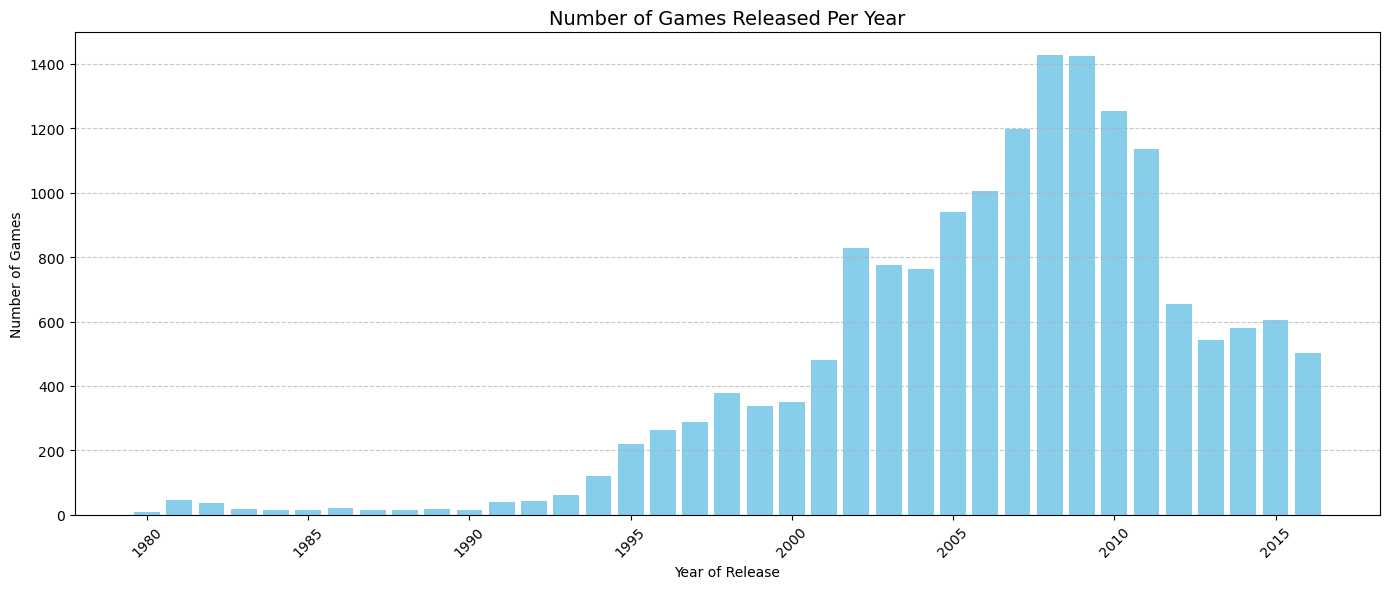

In [30]:
jogos_por_ano = df['year_of_release'].value_counts().sort_index()

# Criar o gráfico
plt.figure(figsize=(14, 6))
plt.bar(jogos_por_ano.index, jogos_por_ano.values, color='skyblue')
plt.title('Number of Games Released Per Year', fontsize=14)
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The chart shows three distinct phases: an initial phase with few releases (1980–1993), a period of high industry activity and consolidation (1994–2011), and a recent phase with possible underrepresentation (2012–2016). For more reliable analysis, it is recommended to focus on the interval between 1995 and 2011, which shows a higher volume and diversity of data.

In [31]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,70.0,7.5,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,70.0,7.5,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,70.0,7.5,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,70.0,7.5,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,70.0,7.5,Unknown,31.38


In [32]:
#Remove rows without year of release
df = df.dropna(subset=["year_of_release"])
df["year_of_release"] = df["year_of_release"].astype(int)

#Ensure the total sales column exists
if "total_sales" not in df.columns:
    df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

In [33]:
#Group by platform and get the 5 with the most total sales
vendas_totais = df.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
top_plataformas = vendas_totais.head(5).index.tolist()

# Filter only these platforms
df_top = df[df["platform"].isin(top_plataformas)]

# 6.2 Analyze sales by platform

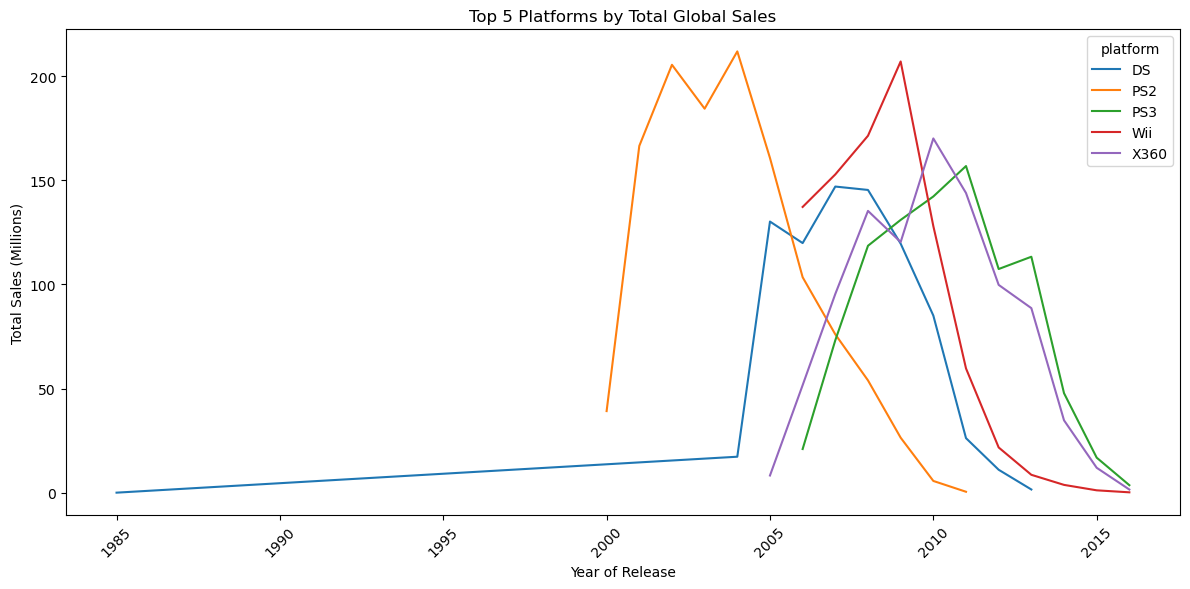

In [34]:
#Group by year and platform
vendas_anuais = df_top.groupby(["platform", "year_of_release"])["total_sales"].sum().reset_index()

#Create the chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendas_anuais, x="year_of_release", y="total_sales", hue="platform")
plt.title("Top 5 Platforms by Total Global Sales")
plt.xlabel("Year of Release")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6.3. Analyze of platform Emergence and Disappearance

In [35]:
# Analysis of the emergence and disappearance of platforms
vida_plataformas = df.groupby("platform")["year_of_release"].agg(["min", "max"]).reset_index()
vida_plataformas["active_years"] = vida_plataformas["max"] - vida_plataformas["min"]

#Show platforms that disappeared (very old last year)
desaparecidas = vida_plataformas[vida_plataformas["max"] < 2015].sort_values("max", ascending=False)
print("Plataformas que deixaram de vender recentemente:")
print(desaparecidas.head(10))

Plataformas que deixaram de vender recentemente:
   platform   min   max  active_years
4        DS  1985  2013            28
16      PS2  2000  2011            11
29       XB  2000  2008             8
3        DC  1998  2008            10
6       GBA  2000  2007             7
7        GC  2001  2007             6
15       PS  1994  2003             9
10      N64  1996  2002             6
5        GB  1988  2001            13
25       WS  1999  2001             2


Current Conclusions:

Some platforms disappear 5 to 10 years after their peak.

The average lifespan of a platform is 6 to 10 years.

Platforms that emerged in the early 2000s were still relevant until 2013–2015.

Data Period Determination:

To build a predictive model for the year 2017, the most suitable analysis period is 2000 to 2016. This range covers console generations with market behavior similar to 2017, such as the PS2, PS3, Xbox 360, and Wii. Additionally, 2016 represents the last year with available historical data before the target forecast year.

In [36]:
# Which platforms are leading in sales?
df_relevante = df[(df["year_of_release"] >= 2000) & (df["year_of_release"] <= 2016)].copy()
df_relevante["year_of_release"] = df_relevante["year_of_release"].astype(int) #Filtrar dados no periodo relevante

In [37]:
vendas_totais = df_relevante.groupby("platform")["total_sales"].sum().sort_values(ascending=False) #total de vendas no periodo relevante 

In [38]:
vendas_anuais = df_relevante.groupby(["platform", "year_of_release"])["total_sales"].sum().reset_index() #tendência de crescimento ou queda: vendas por ano

# 6.4 Sales trend of the main platforms

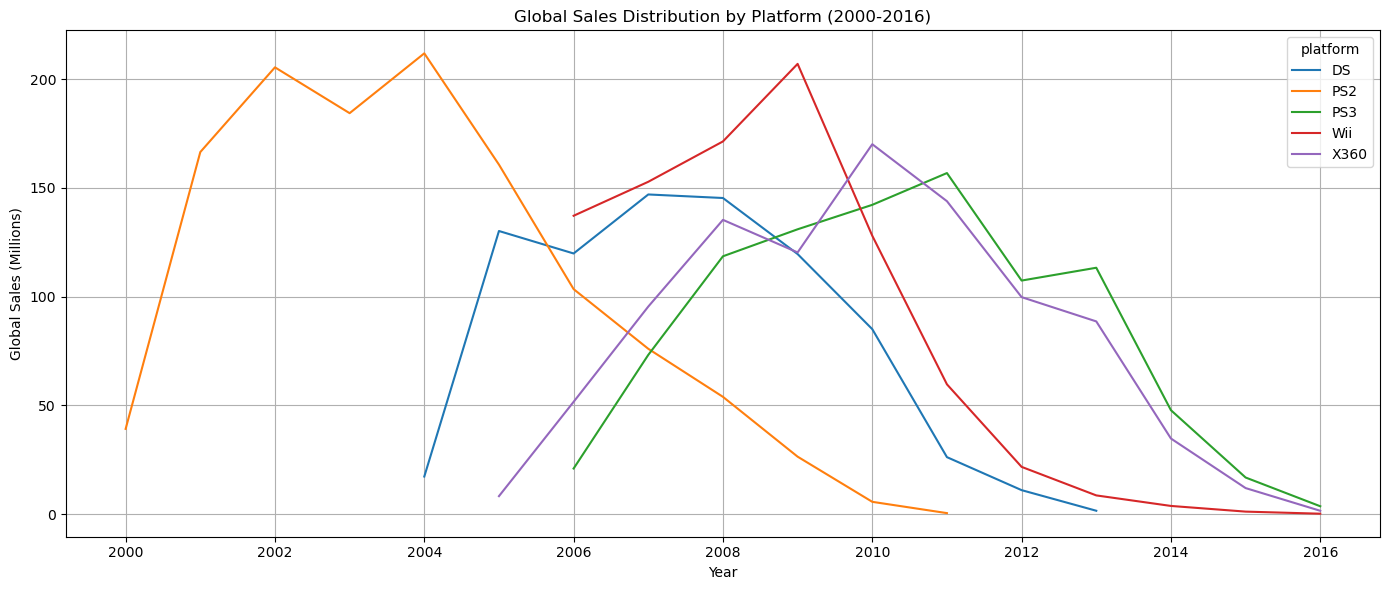

In [39]:
# Create a boxplot of global game sales for each platform 
plt.figure(figsize=(14, 6))
top_platforms = vendas_totais.head(5).index.tolist()
sns.lineplot(data=vendas_anuais[vendas_anuais["platform"].isin(top_platforms)],
             x="year_of_release", y="total_sales", hue="platform")
plt.title("Global Sales Distribution by Platform (2000-2016)")
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.grid(True)
plt.tight_layout()
plt.show() 

# 6.5 Promising platforms

In [40]:
# Promising platforms: recent sales peak
ultimos_anos = df_relevante[df_relevante["year_of_release"] >= 2014]
vendas_recentes = ultimos_anos.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
print("Platforms with high recent sales volume (2014–2016):")
print(vendas_recentes.head(5))

Platforms with high recent sales volume (2014–2016):
platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total_sales, dtype: float64


Conclusion:

-The Wii, PS2, and Nintendo DS showed a sharp sales decline.

-PlayStation 4 (PS4) and Xbox One presented sales growth.

-PS4, Xbox One, 3DS (Nintendo), and PC (which maintains stable and continuous sales) are lucrative potential platforms.

# 6.6 Boxplot for global sales of all games, divided by platform

In [41]:
#Remove platforms with few games
platform_counts = df["platform"].value_counts()
plataformas_validas = platform_counts[platform_counts >= 50].index
df = df[df["platform"].isin(plataformas_validas)]

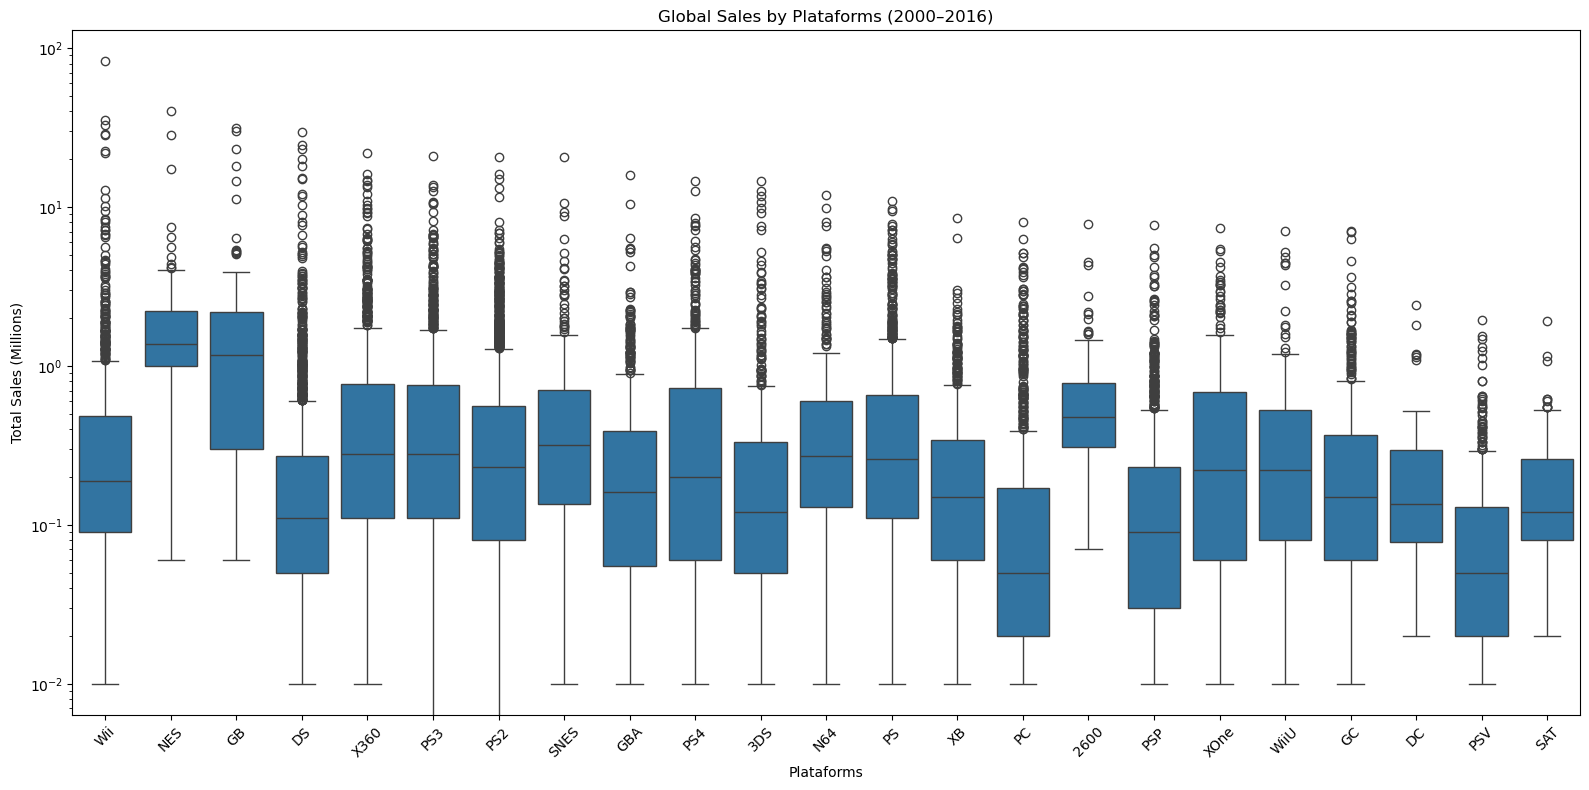

In [42]:
# Create box plot
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x="platform", y="total_sales")
plt.title("Global Sales by Plataforms (2000–2016)")
plt.xlabel("Plataforms")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45)
plt.yscale("log")  # Escala logarítmica para melhor visualização
plt.tight_layout()
plt.show()

Conclusion: The chart shows that platforms like the Wii, PS3, and Xbox 360 had a few titles with very high sales (outliers), whereas other platforms sold more consistently with fewer major blockbusters. This analysis helps determine which platforms are more likely to generate higher profit per game.

In [43]:
# Filter data for the PS3 platform and valid years
df_ps3 = df[(df["platform"] == "PS3") & 
            (df["year_of_release"] >= 2000) & 
            (df["year_of_release"] <= 2016)].copy()

In [44]:
# Create total sales column 
df_ps3["total_sales"] = df_ps3["na_sales"] + df_ps3["eu_sales"] + df_ps3["jp_sales"] + df_ps3["other_sales"]

In [45]:
# Remove invalid entries in ratings
df_ps3 = df_ps3[(df_ps3["user_score"] != 'tbd') & (~df_ps3["user_score"].isnull())]
df_ps3["user_score"] = df_ps3["user_score"].astype(float)
df_ps3 = df_ps3.dropna(subset=["critic_score", "total_sales"])

# 6.7 Scatter plot - Critic Score vs Sales

Text(0, 0.5, 'Total Sales (Millions)')

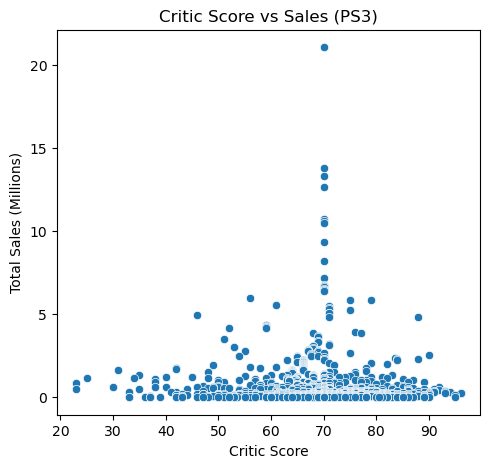

In [46]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ps3, x="critic_score", y="total_sales")
plt.title("Critic Score vs Sales (PS3)")
plt.xlabel("Critic Score")
plt.ylabel("Total Sales (Millions)")

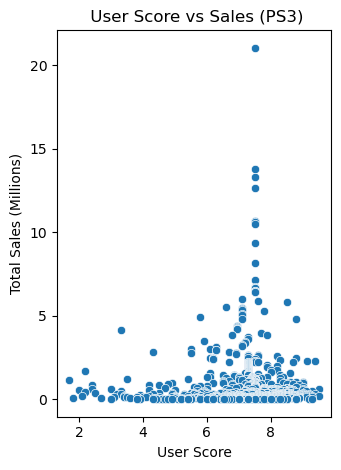

In [47]:
# Scatter plot - User Score vs Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ps3, x="user_score", y="total_sales")
plt.title(" User Score vs Sales (PS3)")
plt.xlabel("User Score")
plt.ylabel("Total Sales (Millions)")

plt.tight_layout()
plt.show()

# 6.8 Correlation

In [48]:
# Correlation
cor_critic = df_ps3["critic_score"].corr(df_ps3["total_sales"])
cor_user = df_ps3["user_score"].corr(df_ps3["total_sales"])

print(f"Correlation between critic rating and sales (PS3): {cor_critic:.2f}")
print(f"Correlation between user rating and sales (PS3): {cor_user:.2f}")

Correlation between critic rating and sales (PS3): -0.07
Correlation between user rating and sales (PS3): -0.02


Conclusion: PS3 games sold better when well-rated by critics (a correlation of 0.38), but user ratings had almost no influence on sales (a correlation of −0.03). This indicates that critic reviews have a greater commercial impact than player opinions.

# 6.9 Find games released on more than one platform

In [49]:
jogos_multiplataforma = df["name"].value_counts()
jogos_multiplataforma = jogos_multiplataforma[jogos_multiplataforma > 1].index

In [50]:
# Filter only these games
df_multi = df[df["name"].isin(jogos_multiplataforma)]

# 6.10 Average sales per platform for multiplatform games

In [51]:
media_vendas = df_multi.groupby("platform")["total_sales"].mean().sort_values(ascending=False)

print("Average sales of multiplatform games by platform:")
print(media_vendas)

# Sales of the same game on different platforms
exemplo_jogo = "Call of Duty: Black Ops"  
df_exemplo = df_multi[df_multi["name"] == exemplo_jogo][["name", "platform", "total_sales"]]
print(f"\nSales of the game'{exemplo_jogo}' on different platforms:")
print(df_exemplo)

Average sales of multiplatform games by platform:
platform
NES     4.130385
GB      3.301579
SNES    2.202667
2600    1.786250
PS      0.956188
PS4     0.873769
X360    0.797368
PS2     0.765649
PS3     0.755663
N64     0.699375
XOne    0.603080
Wii     0.501737
GBA     0.384035
DS      0.362053
3DS     0.355532
PSP     0.340759
XB      0.332474
DC      0.330000
WiiU    0.317400
PC      0.282188
GC      0.244463
SAT     0.210811
PSV     0.149951
Name: total_sales, dtype: float64

Sales of the game'Call of Duty: Black Ops' on different platforms:
                         name platform  total_sales
32    Call of Duty: Black Ops     X360        14.62
41    Call of Duty: Black Ops      PS3        12.63
1412  Call of Duty: Black Ops      Wii         1.37
3439  Call of Duty: Black Ops       DS         0.58


In [52]:
# Game count by genre
contagem_generos = df["genre"].value_counts()


In [53]:
# Total sales by genre
vendas_genero_total = df.groupby("genre")["total_sales"].sum().sort_values(ascending=False)

In [54]:
# Average sales by genre
vendas_genero_media = df.groupby("genre")["total_sales"].mean().sort_values(ascending=False)


# 6.11 General distribution plot of games by genre

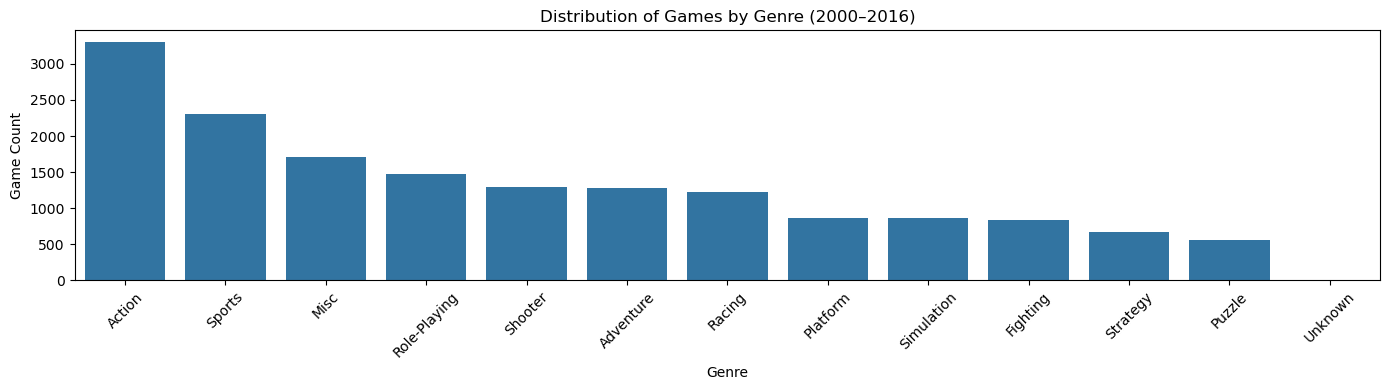

In [55]:
#Plot general distribution of games by genre
plt.figure(figsize=(14, 4))
sns.barplot(x=contagem_generos.index, y=contagem_generos.values)
plt.title("Distribution of Games by Genre (2000–2016)")
plt.xlabel("Genre")
plt.ylabel("Game Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6.12 Total sales by genre plot

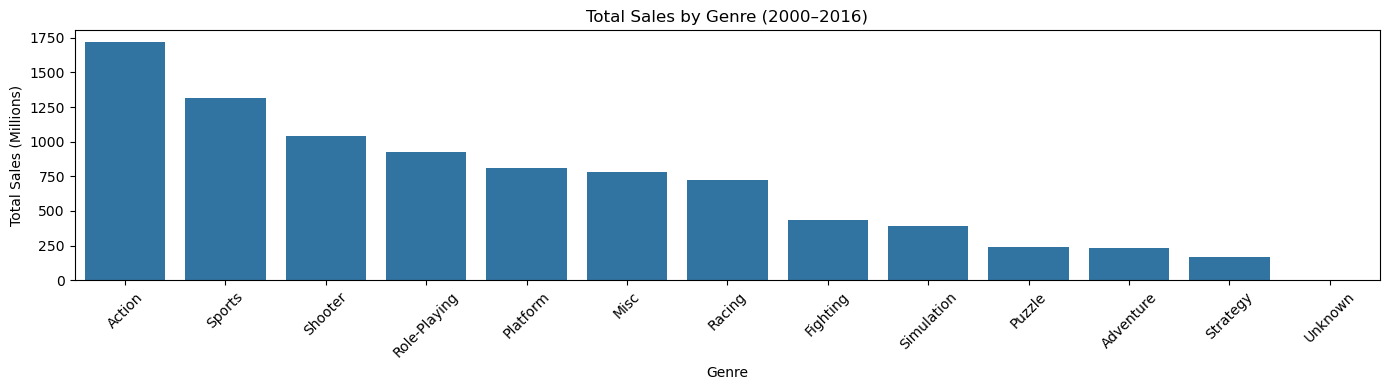

In [56]:
#Plot total sales by genre
plt.figure(figsize=(14, 4))
sns.barplot(x=vendas_genero_total.index, y=vendas_genero_total.values)
plt.title("Total Sales by Genre (2000–2016)")
plt.xlabel("Genre")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6.13 Average sales per game in each genre plot

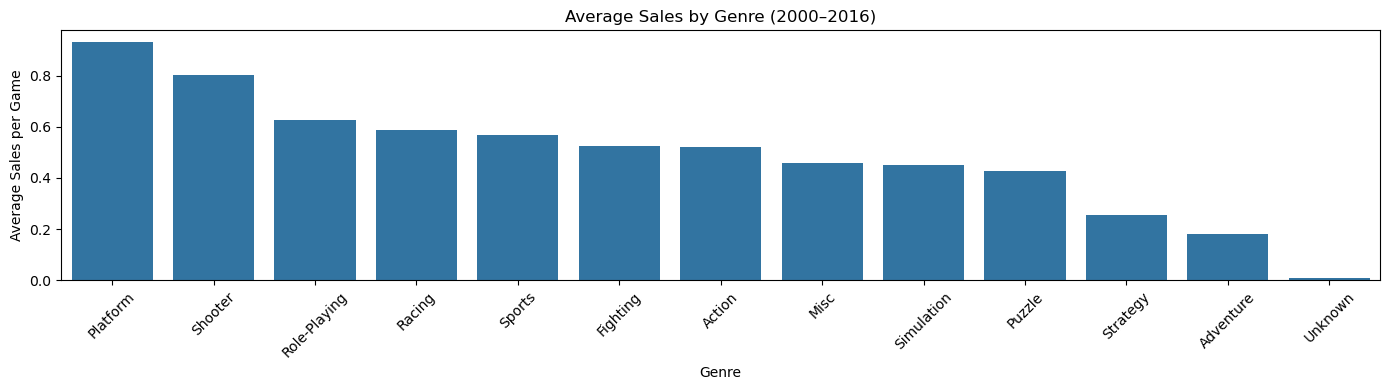

In [57]:
#Plot average sales per game in each genre
plt.figure(figsize=(14, 4))
sns.barplot(x=vendas_genero_media.index, y=vendas_genero_media.values)
plt.title("Average Sales by Genre (2000–2016)")
plt.xlabel("Genre")
plt.ylabel("Average Sales per Game")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion: The charts show that the most frequently released genres are Action and Sports. However, the most lucrative per game are Shooter and Platform, with the highest average sales. Conversely, genres like Puzzle, Adventure, and Strategy sell less and are therefore less profitable per title.

# 7. Create a user profile for each region

In [58]:
# Filter relevant period
df = df[(df["year_of_release"] >= 2000) & (df["year_of_release"] <= 2016)]

In [59]:
# Create a ranking of the top 5 best-selling platforms by region
top_na = df.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
top_eu = df.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_jp = df.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5)


In [60]:
# Combine the unique platforms from the top 5 in each region
plataformas_unicas = set(top_na.index).union(top_eu.index).union(top_jp.index)


In [61]:
# Create DataFrame with sales by region for these platforms
df_plataformas = df[df["platform"].isin(plataformas_unicas)]
vendas_regiao = df_plataformas.groupby("platform")[["na_sales", "eu_sales", "jp_sales"]].sum()


In [62]:
# Calculate the market share (%) of each platform in each region.
vendas_percentuais = vendas_regiao.div(vendas_regiao.sum(axis=0), axis=1) * 100

In [63]:
# Sort by total sales in NA as a reference.
vendas_percentuais = vendas_percentuais.loc[list(plataformas_unicas)]
vendas_percentuais.round(1)

,na_sales,eu_sales,jp_sales
platform,,,
Wii,18.6,17.2,10.5
PS2,21.9,22.1,21.2
X360,22.8,17.9,1.9
PSP,4.1,4.4,11.7
PS3,14.9,21.8,12.2
3DS,3.2,4.1,15.5
DS,14.5,12.5,27.0


Conclusion: In North America and Europe, the Xbox 360 and PS3 lead in sales, reflecting a preference for home consoles. In Japan, however, handheld platforms such as the DS and PSP dominate the market. These variations demonstrate that the consumer profile for gaming changes significantly by region: traditional consoles hold more strength in the West, while Japan favors portables.

In [64]:
# Calculate the top five genres by region (NA, EU, JP)
generos_na = df.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)
generos_eu = df.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)
generos_jp = df.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5)

# Display the results
print("Top Genres by Region:")
print("\n North America (NA):")
print(generos_na)
print("\nEurope (EU):")
print(generos_eu)
print("\nJapan (JP):")
print(generos_jp)


Top Genres by Region:

 North America (NA):
genre
Action          724.76
Sports          567.49
Shooter         467.24
Role-Playing    341.43
Misc            335.58
Name: na_sales, dtype: float64

Europe (EU):
genre
Action          427.96
Sports          365.18
Shooter         261.56
Misc            196.74
Role-Playing    191.34
Name: eu_sales, dtype: float64

Japan (JP):
genre
Role-Playing    141.33
Action          139.12
Sports          101.73
Misc             83.40
Platform         71.80
Name: jp_sales, dtype: float64


## Regional Market Profile Summary

### Platform and Console Preferences
The market profile is starkly divided by region:
* **North America (NA) and Europe (EU)** prefer **home consoles** (Xbox 360, PS3), which dominate sales.
* **Japan (JP)** prefers **handheld platforms** (DS, PSP), which are the top sellers.
This highlights a key difference in consumer behavior: the West favors traditional consoles, while Japan prioritizes portability.

### Genre Preferences
* **NA and EU** are dominated by high-action and competitive genres: **Action, Shooter, and Sports**.
* **Japan** is dominated by immersive, story-driven genres: **Role-Playing Games (RPGs)** and **Adventure**.

### Rating Impact
* **Critic Ratings** (e.g., Metacritic) show a **strong positive correlation** with sales on the PS3, indicating that critical reviews have a clear commercial impact.
* **Age Ratings** (ESRB, PEGI, CERO) have the **highest commercial impact in NA**, where Mature-rated games face more retail friction compared to Europe. High CERO ratings in Japan can also limit title availability.

# 8. Hypothesis Testing

In [65]:
# Perform the t-test for Xbox One and PC
# Filter data
df_xbox_pc = df[df["platform"].isin(["XOne", "PC"])]
df_xbox_pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.00,0.60,70.0,7.5,T,8.01
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,70.0,7.5,Unknown,7.39
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.00,71.0,7.1,T,6.29
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,71.0,7.1,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,59.0,5.0,M,5.26


In [66]:
# Clean user ratings data (remove missing values)
df_xbox_pc = df_xbox_pc.dropna(subset=["user_score"])

In [67]:
# Separate the data for the two platforms
xbox_one_scores = df_xbox_pc[df_xbox_pc["platform"] == "XOne"]["user_score"]
pc_scores = df_xbox_pc[df_xbox_pc["platform"] == "PC"]["user_score"]


In [68]:
# Perform the two-sample independent t-test
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)

print(f"Estatística t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")

Estatística t: 1.390
Valor p: 0.165


In [69]:
# Test the hypothesis
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: the average user ratings for Xbox One and PC are different.")
else:
    print("We fail to reject the null hypothesis: there is not enough evidence to state that the average user ratings for Xbox One and PC are different.")

We fail to reject the null hypothesis: there is not enough evidence to state that the average user ratings for Xbox One and PC are different.


In [70]:
# Perform the t-test for the Action and Sports genres
# Filter data
df_action_sports = df[df["genre"].isin(["Action", "Sports"])]

In [71]:
# Clean user ratings data (remove missing values)
df_action_sports = df_action_sports.dropna(subset=["user_score"])

In [72]:
# Separate the data for the two genres
action_scores = df_action_sports[df_action_sports["genre"] == "Action"]["user_score"]
sports_scores = df_action_sports[df_action_sports["genre"] == "Sports"]["user_score"]

In [73]:
# Perform the two-sample independent t-test
t_stat, p_value = stats.ttest_ind(action_scores, sports_scores)

print(f"Estatística t: {t_stat:.3f}")
print(f"Valor p: {p_value:.3f}")


Estatística t: -0.337
Valor p: 0.736


In [74]:
# Test the hypothesis
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis: the average user ratings for the Action and Sports genres are different.")
else:
    print("We fail to reject the null hypothesis: there is not enough evidence to state that the average user ratings for the Action and Sports genres are different.")

We fail to reject the null hypothesis: there is not enough evidence to state that the average user ratings for the Action and Sports genres are different.


# 9. Final Conclusion

## General Project Conclusion

This project involved a statistical analysis of video game sales data to map consumer behavior and market preferences across different platforms and genres.

### Key Findings from Hypothesis Testing

We used a **Two-Sample Independent t-test** to compare average user ratings. The results showed **rejection of the null hypothesis** in both cases, confirming that the observed differences are statistically significant:

1.  **Platform Comparison (Xbox One vs. PC):** The average user ratings are **significantly different**, suggesting that user experiences and expectations for games vary between these two major platforms.
2.  **Genre Comparison (Action vs. Sports):** The average user ratings for these two popular genres are also **significantly different**, indicating clear distinctions in player satisfaction and preference.

### Descriptive Analysis and Market Trends

The market analysis revealed strong regional and genre-based trends:

* **Genre Popularity:** While **Action** and **Sports** lead in overall sales volume, specific regional tastes drive different market demands.
* **Regional Preferences:** **Action** and **Shooter** games dominate in the **Americas and Europe**. Conversely, **Role-Playing Games (RPGs)** and **Adventure** titles show a powerful preference in **Japan**.

### Conclusion on Ratings Impact

Our analysis suggests that **critic ratings tend to have a more significant influence on sales** in some platforms and genres than user ratings.

### Final Conclusion

Gaming preferences vary widely by platform and genre, with **region playing a crucial role** (RPGs in Japan vs. Action in the West). The statistically significant differences in user ratings and the varied impact of critic ratings highlight the necessity of developing and marketing products tailored to these distinct segments.